# Walmart

# --------------------------------------------------------------------------------------------------------

#### Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas.

# --------------------------------------------------------------------------------------------------------

##### Task is to analyze  the sales of  walmart with the data given. (eg: anaglysing weekly sales, which store or department sells most etc.)

## DATA ANALYSIS AND VIZUALIZATION 

#### Importing all the required libraries and packages.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

#### Reading all the csv files as dataframes using pd.read_csv method.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ls

drive/  sample_data/


In [4]:
%cd drive/

/content/drive


In [5]:
train_df = pd.read_csv('MyDrive/Final Project Regex/train.csv')
features_df=pd.read_csv('MyDrive/Final Project Regex/features.csv')
stores_df = pd.read_csv('MyDrive/Final Project Regex/stores.csv')


#### Aanalyzing Each imported data frames.

#### Viewing the data in train_df 

###### We can see that the dataframe has weekly  sales data in accordance with store department and date.

In [6]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


###### Describe the data in train_df, that is mean count etc of the numerical columns in the data frame.

In [8]:
train_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


###### This shows how many null values each column in the data frame has, we can see that there are no null values in any columns of the data frame.

In [9]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

###### Viewing the test_df

In [10]:
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [11]:
test_df.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday'], dtype='object')

###### Describing the data in the test dataframe.

In [12]:
test_df.describe()

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


##### Analysing null values in each column.

In [13]:
test_df.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

##### Viewing the features dataframe.

In [14]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


##### Viewing the Info of each column in the features dataframe.

In [15]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [16]:

features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


##### Finding out about the null values in each column.

In [17]:
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

##### Viewing the stores data frame.

In [18]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [19]:
stores_df.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


##### Finding the null values in each column.

In [20]:
stores_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

##### Create a new data frame by merging (inner) features data frame to stores data frame  on Store for analysis purpose.

In [21]:
dataset_m = features_df.merge(stores_df, how= 'inner', on = 'Store')
dataset_m.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


##### Gathering info regarding the columns of the new data frame.

In [22]:
dataset_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  Type          8190 non-null   object 
 13  Size          8190 non-null   int64  
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 903.8+ KB


##### Convering date to date time object.

In [23]:
from datetime import datetime
#converting date to date time object
dataset_m['Date'] = pd.to_datetime(dataset_m['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])
#Extract day, week and year from the date and make them into new columns.
dataset_m['week_of_year'] = dataset_m['Date'].dt.weekofyear
dataset_m['year']=(dataset_m['Date']+pd.to_timedelta(6-dataset_m['Date'].dt.weekday, unit='d')).dt.year
# dataset_m['Weekday'] = dataset_m['Date'].dt.day_name()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [24]:
dataset_m.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,week_of_year,year
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,2010
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,6,2010
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,7,2010
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,8,2010
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,9,2010


In [25]:
dataset_m.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,week_of_year,year
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221,26,2013
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221,27,2013
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221,28,2013
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221,29,2013
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False,B,118221,30,2013


##### Creating a new df by merging (inner) the train_df and the new data frame dataset_m on  store, date and IsHoliday columns and sorting the values by Store, department and date.

In [26]:
train_df_1 = train_df.merge(dataset_m, how='inner', on=['Store', 'Date', 'IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [27]:
train_df_1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week_of_year,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,6,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,7,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,8,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,9,2010


In [28]:
train_df_1['MarkDown1'].isna().sum()

270889

In [29]:
train_df_1.shape

(421570, 18)

# --------------------------------------------------------------------------------------------------------

# VISUALIZATIONS 

# ----------------------------------------------------------------------------------------------------------------------------

---



---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Defining a function scatter to plot the scatter plot with the data of the column specified as the function parameter in x axis and weekly sales as the y values.

### 1) scatter plot

In [30]:
def scatter(train_df_1, column):
    #plot the figure
    plt.figure()
    #plot the scatter plot with data from the specified column in x axis and weekly sales in y axis
    plt.scatter(train_df[column], train_df['Weekly_Sales'])
    #give y label as weekly_sales
    plt.ylabel('Weekly_Sales')
    #Give the xlabel as the column specified as parameter in the function
    plt.xlabel(column)

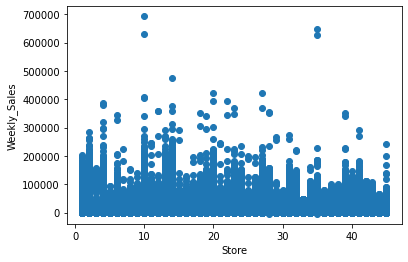

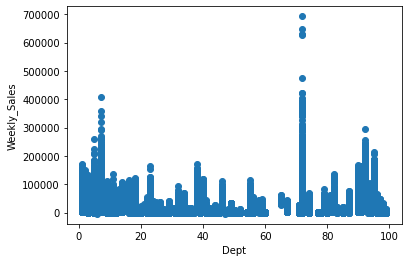

In [31]:
#plot a scatter plot using the scatter function a scatter plot of weekly sales with respect to Store
scatter(train_df_1, 'Store')
#plot a scatter plot using the scatter function a scatter plot of weekly sales with respect to Department
scatter(train_df_1, 'Dept')

We can see scatter plots of weekly sales with respect to stores and department, we can see that departments between 60 and 80 are performing better.

-------------------------------------------------------------------------------------------------------------------------------

### 2) 3 line plots for weekly sales for each year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


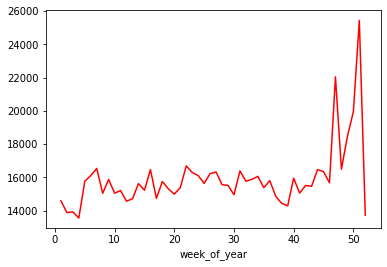

In [32]:
#Filtering out mean weekly sales for the year 2011
weekly_sales_2011 = train_df_1[train_df_1['year'] ==  2011]['Weekly_Sales'].groupby(train_df_1['week_of_year']).mean()
#Plot a line plot with week on x axis and sales for that particular week of the filtered year in y axis
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values,color='red')

This is the line plot for weekly sales in the year 2011

-------------------------------------------------------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


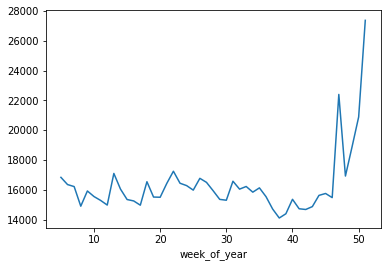

In [33]:
#Filtering out mean weekly sales for the year 2010
weekly_sales_2010 = train_df_1[train_df_1['year'] ==  2010]['Weekly_Sales'].groupby(train_df_1['week_of_year']).mean()
#Plot a line plot with week on x axis and sales for that particular week of the filtered year in y axis
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)


-------------------------------------------------------------------------------------------------------------------------------

This is the line plot for weekly sales in the year 2010

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


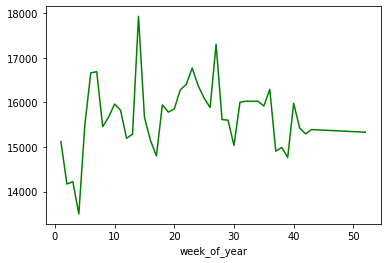

In [34]:
#Filtering out mean weekly sales for the year 2012
weekly_sales_2012 = train_df_1[train_df_1['year'] ==  2012]['Weekly_Sales'].groupby(train_df_1['week_of_year']).mean()
#Plot a line plot with week on x axis and sales for that particular week of the filtered year in y axis
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values,color='green')

This is the line plot for weekly sales in the year 2012

-------------------------------------------------------------------------------------------------------------------------------

### 3) Combined line plots for each year (2010,2011,2012)

#### Plotting the weekly sales for years 2010,2011,2012 on a single plot to compare the sales values with respect to week on each of these specified year for comparing the weekly sales in each year.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


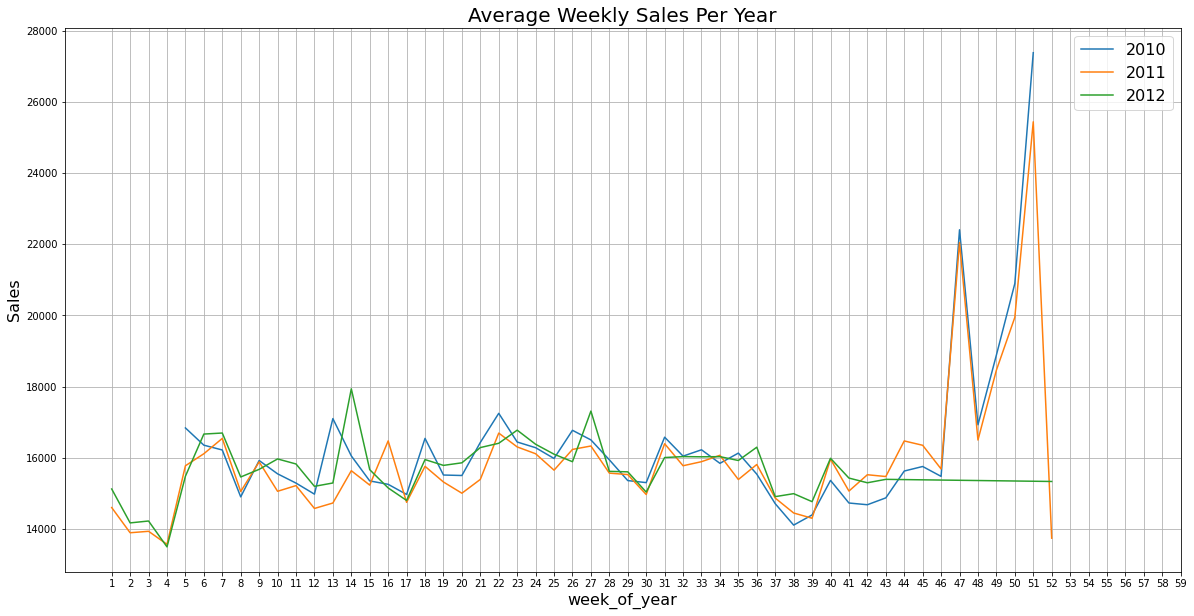

In [35]:
#plotting a figure 
plt.figure(figsize= (20, 10))
#Plotting three line plots for weekly sales for each year
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
plt.grid()
#plot labels and legends
plt.xticks(np.arange(1,60, step= 1))
plt.title('Average Weekly Sales Per Year', fontsize = 20)
plt.xlabel('week_of_year', fontsize = 16)
plt.ylabel('Sales', fontsize = 16)
plt.legend(['2010', '2011','2012'], loc = 'best', fontsize = 16)
plt.show()

#### We can see from the combined line lot that on week 51 of 2010 we have the maximum sale 

Line plots between week and weekly sales is a good way to compare sales for each year.

-------------------------------------------------------------------------------------------------------------------------------

### 4) Histogram / Normal Distribution 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


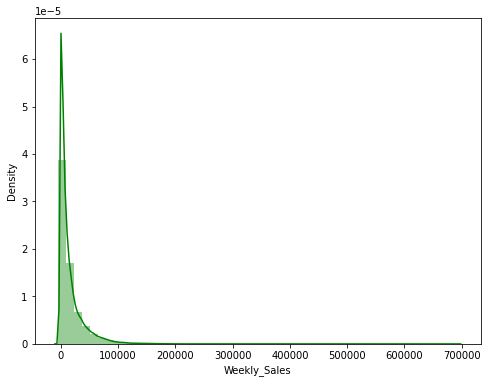

In [36]:
f, ax = plt.subplots(figsize=(8, 6))
#Creating a distribution for weekly sales in the dataframe train_df
sns.distplot(train_df['Weekly_Sales'],color='g')

In [37]:
#Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.
print("Skewness: ", train_df['Weekly_Sales'].skew()) #skewness
#Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers
print("Kurtosis: ", train_df['Weekly_Sales'].kurt()) #kurtosis

Skewness:  3.2620081854656657
Kurtosis:  21.49128990832619


The above code is to determine the skew and kurtosis of the normal distribution.

-------------------------------------------------------------------------------------------------------------------------------

### 5) Box Plot

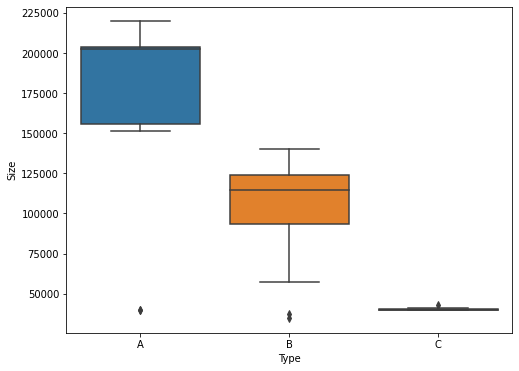

In [38]:
#concatinating the type and column from store_df together to find the relation between stores falling under each type and size.
data = pd.concat([stores_df['Type'], stores_df['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
#Plot a box plot to understand the relation between type and size of stores.
fig = sns.boxplot(x='Type', y='Size', data=data)

From the above box plots we can see that Type A plots are the largest, ie has the largest size

-------------------------------------------------------------------------------------------------------------------------------

### 6) Bar Chart On Data Frame

In [39]:
weekly_sales_store = train_df['Weekly_Sales'].groupby(train_df['Store']).mean()

#### Grouping the train_df by store and computing the mean of weekly_sales for each store.

visualizing the data

In [40]:
weekly_sales_store.head()

Store
1    21710.543621
2    26898.070031
3     6373.033983
4    29161.210415
5     5053.415813
Name: Weekly_Sales, dtype: float64

#### Converting the data to a pandas dataframe

In [41]:
weekly_sales_store_df=pd.DataFrame(weekly_sales_store)

#### Sorting the data frame with respect to weekly sales in Descending order and plotting a var graph on the data frame itself to get a idea about the data.

In [42]:
weekly_sales_store_df.sort_values("Weekly_Sales",ascending=False).style.bar(align='left',width=98,color='#FFD200')

,Weekly_Sales
Store,
20,29508.301592
4,29161.210415
14,28784.851727
13,27355.136891
2,26898.070031
10,26332.303819
27,24826.984536
6,21913.243624
1,21710.543621


### We can see that Store number 20 has the highest weekly sales (20508.301592)

-------------------------------------------------------------------------------------------------------------------------------

#### Sorting the data frame with respect to weekly sales in Ascending order and plotting a var graph on the data frame itself to get a idea about the data.

In [43]:
weekly_sales_store_df.sort_values("Weekly_Sales").style.bar(align='left',width=98,color='#ff00bf')

,Weekly_Sales
Store,
5,5053.415813
33,5728.414053
44,6038.929814
3,6373.033983
38,7492.478460
16,7863.224124
29,8158.810609
7,8358.766148
36,8584.412563


### We can see that Store number 5 has the least weekly sales (5053.415813)

-------------------------------------------------------------------------------------------------------------------------------

### 7) Bar graph fpr mean weekly sales for each store.

## Plotting a bar graph with store number as x values and mean weekly sales for that store as the y values.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


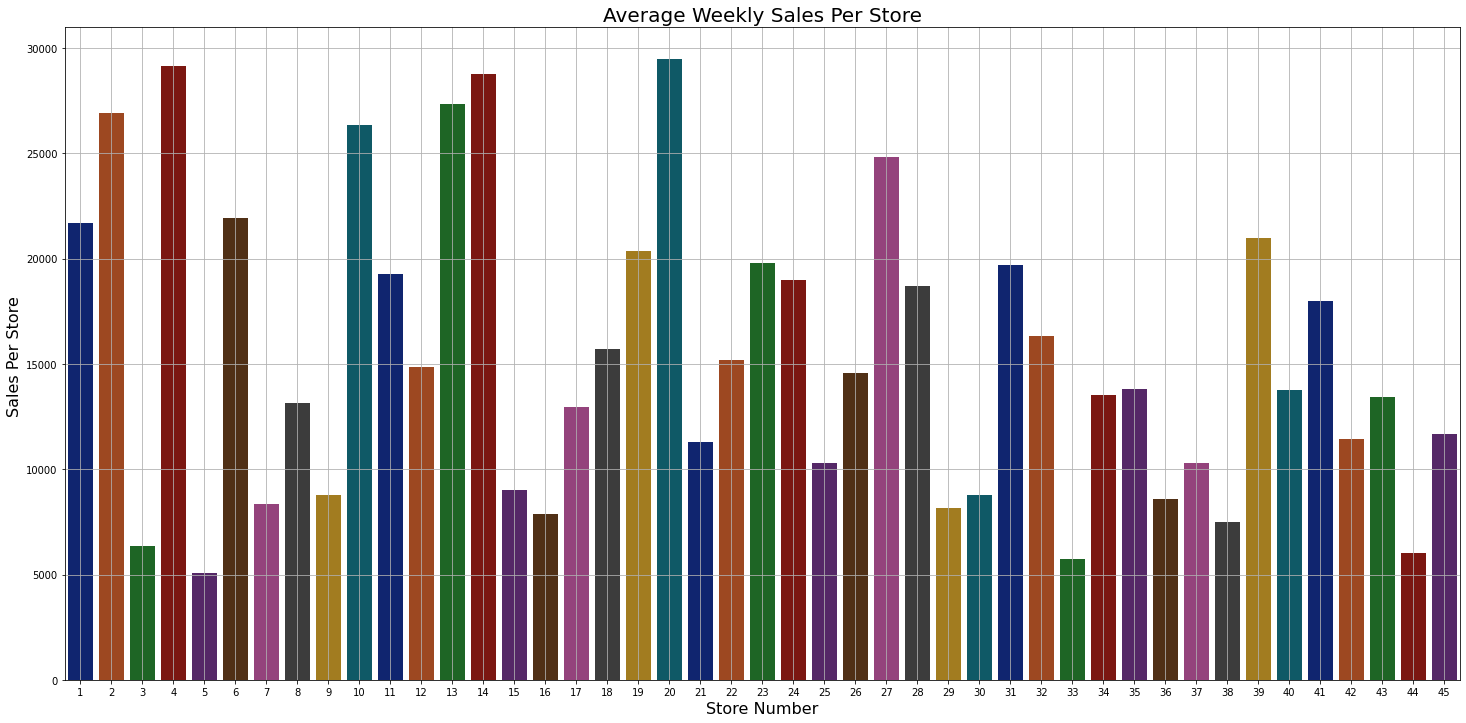

In [44]:
#Plotting the figure.
plt.figure(figsize= (25, 12))
#Creating a barplot with stores in x axis and mean weekly sales for each store as y values.
sns.barplot(weekly_sales_store.index, weekly_sales_store.values,palette='dark')
#plot a grid
plt.grid()
#Give title,x and y labels for the plot
plt.title('Average Weekly Sales Per Store', fontsize = 20)
plt.xlabel('Store Number', fontsize = 16)
plt.ylabel('Sales Per Store ', fontsize = 16)
plt.show()

1)We can see that this plot is a great way to analyse how each store is performing sales wise.

2)From the plot we can see that store number 20 has the highesst mean weekly sales, followed by store 4 and then store 14.



-------------------------------------------------------------------------------------------------------------------------------

#### Grouping the train_df by Department and computing the mean of weekly_sales for each Department.

### 8) Bar chart on Data Frame.

In [45]:
weekly_sales_Dept = train_df['Weekly_Sales'].groupby(train_df['Dept']).mean()

converting it to a pandas dataframe


In [46]:
weekly_sales_Dept_df= pd.DataFrame(weekly_sales_Dept)

In [47]:
weekly_sales_Dept_df

,Weekly_Sales
Dept,
1,19213.485088
2,43607.020113
3,11793.698516
4,25974.630238
5,21365.583515
...,...
95,69824.423080
96,15210.942761
97,14255.576919


#### Sorting the data frame with respect to weekly sales in Descending order and plotting a var graph on the data frame itself to get a idea about the data.

In [48]:
weekly_sales_Dept_df.sort_values("Weekly_Sales",ascending=False).style.bar(align='left',width=98,color='#d65f5f')

,Weekly_Sales
Dept,
92,75204.870531
95,69824.423080
38,61090.619568
72,50566.515417
65,45441.706224
90,45232.084488
40,44900.702727
2,43607.020113
91,33687.910758


### We can see that Department number 92 has the largest weekly sales.

-------------------------------------------------------------------------------------------------------------------------------

####  Sorting the data frame with respect to weekly sales in Ascending order and plotting a var graph on the data frame itself to get a idea about the data.

In [49]:
weekly_sales_Dept_df.sort_values("Weekly_Sales").style.bar(align='left',width=98,color='#bfff00')

,Weekly_Sales
Dept,
47,-7.682554
43,1.193333
78,7.296638
39,11.123750
51,21.931729
45,23.211586
54,108.305985
77,328.961800
60,347.370229


### We can see that department 47 has a cumulative negative value for weekly sales followed by department 43 which has a very low weekly sale of 1.193333

-------------------------------------------------------------------------------------------------------------------------------

### 9)Bar graph fpr mean weekly sales for each Department.

## Plotting a bar graph with Department number as x values and mean weekly sales for that store as the y values.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


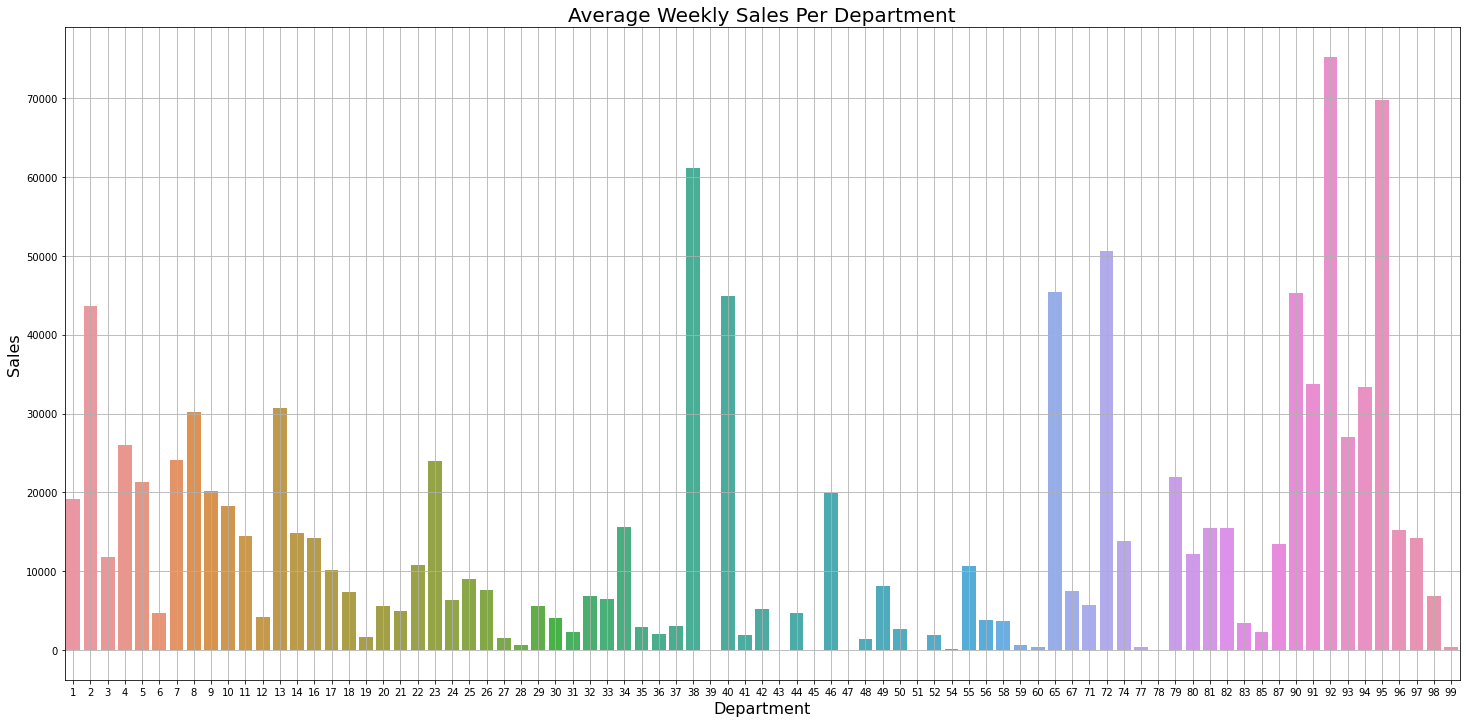

In [50]:
#Plot a figure
plt.figure(figsize= (25, 12))
#Creating a barplot with department in x axis and mean weekly sales for each store as y values.
sns.barplot(weekly_sales_Dept.index, weekly_sales_Dept.values)
#plot a grid
plt.grid()
#Give title,x and y labels for the plot
plt.title('Average Weekly Sales Per Department', fontsize = 20)
plt.xlabel('Department', fontsize = 16)
plt.ylabel('Sales', fontsize = 16)
plt.show()

We can see that weekly sales is highest for department 92.

-------------------------------------------------------------------------------------------------------------------------------

### 10) Series of line plots for mean sales with respect to Departments.

#### Creating line plots of mean weekly sales for each department in the dataframe.

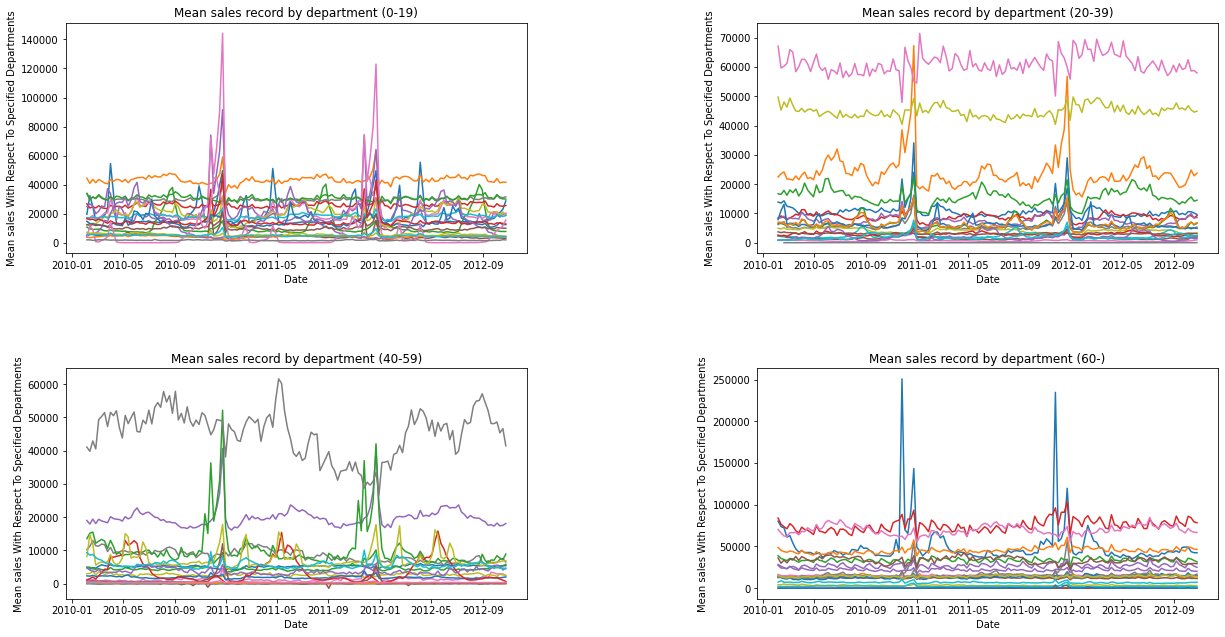

In [51]:
#Creating a data frame grouped by grouping the train_df on department and date.
grouped=train_df.groupby(['Dept','Date']).mean().reset_index()

#Filtering out Department, Date, Weekly sales from the new data frame grouped.
data=grouped[['Dept','Date','Weekly_Sales']]

#Finding out unique values in the department column.
dept=train_df['Dept'].unique()
#Sort the unique values in the column
dept.sort()
#Divide the departments into 4 batches
dept_1=dept[0:20]
dept_2=dept[20:40]
dept_3=dept[40:60]
dept_4=dept[60:]

#Create subplots with 2 rows and 2 columns and adjusting the spacing between the subplots.
fig, ax = plt.subplots(2,2,figsize=(20,10))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)


#For each batch containg departments and for each department in each batch plot the weekly sales in accordance with date.
for i in dept_1 :
    data_1=data[data['Dept']==i]
    ax[0,0].plot(data_1['Date'], data_1['Weekly_Sales'],label='Dept_1_mean_sales')

for i in dept_2 :
    data_1=data[data['Dept']==i]
    ax[0,1].plot(data_1['Date'], data_1['Weekly_Sales'],label='Dept_1_mean_sales')
    
for i in dept_3 :
    data_1=data[data['Dept']==i]
    ax[1,0].plot(data_1['Date'], data_1['Weekly_Sales'],label='Dept_1_mean_sales')    

for i in dept_4 :
    data_1=data[data['Dept']==i]
    ax[1,1].plot(data_1['Date'], data_1['Weekly_Sales'],label='Dept_1_mean_sales')        
    
    
#Give each subplot a suitable title    
ax[0,0].set_title('Mean sales record by department (0-19)')
ax[0,1].set_title('Mean sales record by department (20-39)')
ax[1,0].set_title('Mean sales record by department (40-59)')
ax[1,1].set_title('Mean sales record by department (60-)')

#Give each Subplot y and x labels
ax[0,0].set_ylabel('Mean sales With Respect To Specified Departments')
ax[0,0].set_xlabel('Date')
ax[0,1].set_ylabel('Mean sales With Respect To Specified Departments')
ax[0,1].set_xlabel('Date')
ax[1,0].set_ylabel('Mean sales With Respect To Specified Departments')
ax[1,0].set_xlabel('Date')
ax[1,1].set_ylabel('Mean sales With Respect To Specified Departments')
ax[1,1].set_xlabel('Date')


plt.show()

1)The sales level is different by department 


2)There is some peaked points around January and May, thus indicating high sales during those times.

We can see that departments and date are good features to predict the sales.


-------------------------------------------------------------------------------------------------------------------------------

### 11) Histogram / Normal Distribution

### Plotting the normal distribution where sales is greater than zero.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


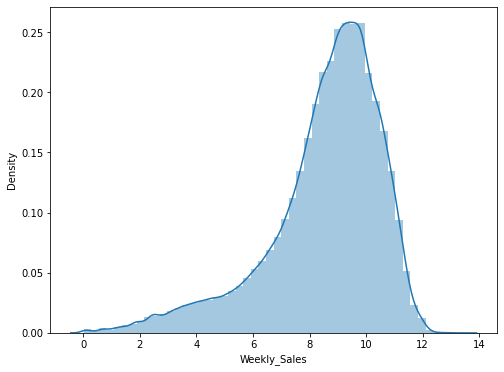

In [52]:
#Data for sales over zero
train_over_zero_sales=train_df[train_df['Weekly_Sales']>0]
#Data for sales less than zero
train_below_zero_sales=train_df[train_df['Weekly_Sales']<=0]
#Natural log of data for sales over zero
sales_over_zero_sales = np.log1p(train_over_zero_sales['Weekly_Sales'])
#plotting a histogram and normal distribution for data with sales over zero.
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(sales_over_zero_sales)

In [53]:
print("Skewness: ", sales_over_zero_sales.skew()) #skewness
print("Kurtosis: ", sales_over_zero_sales.kurt()) #kurtosis

Skewness:  -1.2011878481918052
Kurtosis:  1.5541238937236335


-------------------------------------------------------------------------------------------------------------------------------

### 12) Heatmap

### Plotting a heatmap to determine the correlation between columns in the data frame.

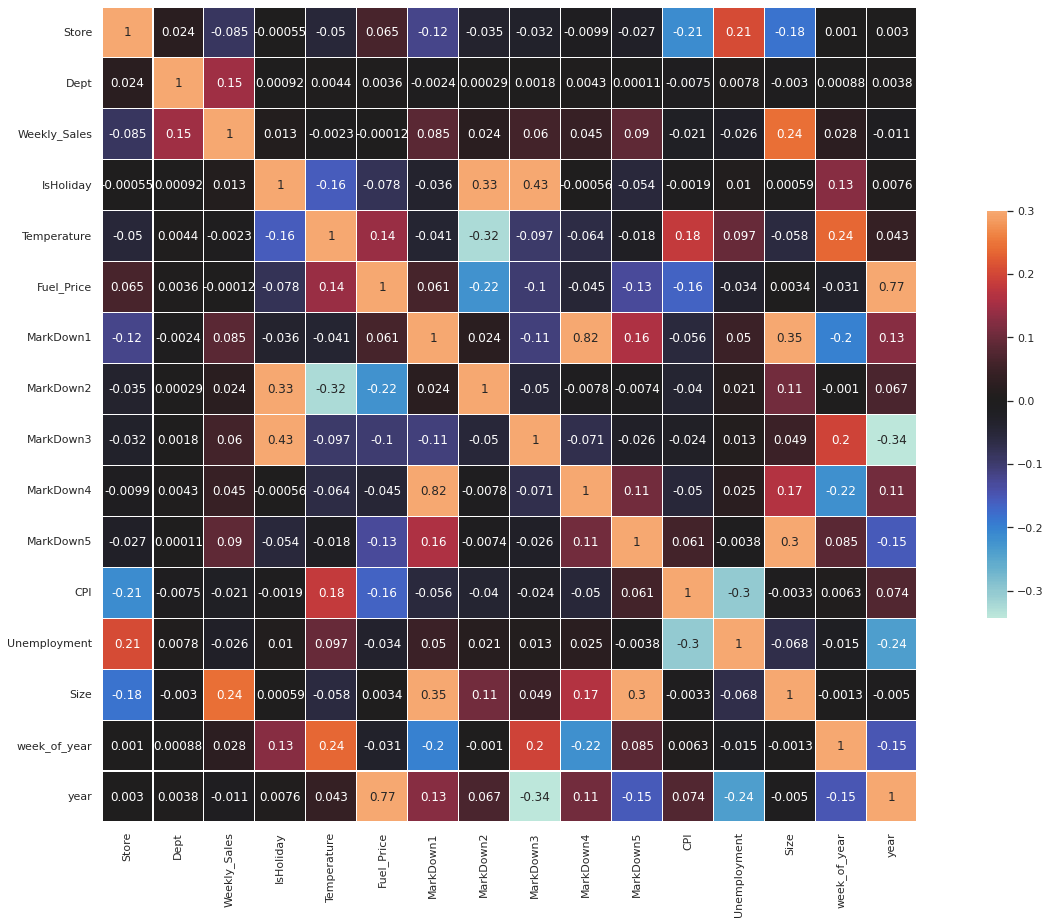

In [54]:
sns.set(style = 'white')
fig, ax = plt.subplots(figsize= (25, 15))
sns.heatmap(train_df_1.corr(), cmap = 'icefire', vmax = 0.3, center = 0, square = True, linewidth= 0.5, cbar_kws = {'shrink': 0.5}, annot = True)

## Sales Prediction

In [55]:
train_df_1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week_of_year,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,6,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,7,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,8,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,9,2010


In [56]:
train_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [57]:
train_df_1.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'week_of_year',
       'year'],
      dtype='object')

In [58]:
train_df_1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week_of_year,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,6,2010
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,7,2010
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,8,2010
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,9,2010


In [59]:
train_df_1.Type.value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

## One Hot encoding on the columns IsHoliday and Type

In [61]:
train_df_1.IsHoliday = pd.get_dummies(train_df_1.IsHoliday, drop_first=True)
type = pd.get_dummies(train_df_1.Type, drop_first=True)
train_df_1 = train_df_1.merge(type, left_index=True, right_index=True)

In [62]:
train_df_1 = train_df_1[['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type','B','C', 'Size',
       'week_of_year', 'year','Weekly_Sales']]

In [63]:
train_df_1.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,B,C,Size,week_of_year,year,Weekly_Sales
0,1,1,2010-02-05,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,0,0,151315,5,2010,24924.50
1,1,1,2010-02-12,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,0,0,151315,6,2010,46039.49
2,1,1,2010-02-19,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,0,0,151315,7,2010,41595.55
3,1,1,2010-02-26,0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,0,0,151315,8,2010,19403.54
4,1,1,2010-03-05,0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,0,0,151315,9,2010,21827.90


## Dropping the columns Date and Type

In [65]:
train_df_1.drop(['Type','Date'], inplace=True, axis=1)

In [66]:
train_df_1['MarkDown1']=train_df_1['MarkDown1'].fillna(0)
train_df_1['MarkDown2']=train_df_1['MarkDown2'].fillna(0)
train_df_1['MarkDown3']=train_df_1['MarkDown3'].fillna(0)
train_df_1['MarkDown4']=train_df_1['MarkDown4'].fillna(0)
train_df_1['MarkDown5']=train_df_1['MarkDown5'].fillna(0)

In [67]:
train_df_1.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,B,C,Size,week_of_year,year,Weekly_Sales
0,1,1,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0,151315,5,2010,24924.50
1,1,1,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,0,151315,6,2010,46039.49
2,1,1,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,0,151315,7,2010,41595.55
3,1,1,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,0,151315,8,2010,19403.54
4,1,1,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,0,151315,9,2010,21827.90


In [68]:
train_df_1.year.value_counts()

2011    153393
2010    137736
2012    130441
Name: year, dtype: int64

In [69]:
x = train_df_1.iloc[: , :-1]
y = train_df_1.iloc[: , -1]

In [70]:
x.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,B,C,Size,week_of_year,year
0,1,1,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,0,151315,5,2010
1,1,1,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,0,151315,6,2010
2,1,1,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,0,151315,7,2010
3,1,1,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,0,151315,8,2010
4,1,1,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,0,151315,9,2010


In [71]:
y.head()

0    24924.50
1    46039.49
2    41595.55
3    19403.54
4    21827.90
Name: Weekly_Sales, dtype: float64

In [104]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

----------------------------------------------------------------------------------

## Hyper Parameter Optimization(XgBoost)



In [73]:

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [74]:
!pip install xgboost
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [77]:
RegXg=xgboost.XGBRegressor()
RegXg.fit(x_train, y_train)


[10:26:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [78]:
y_predXg = RegXg.predict(x_test)
y_predXg

array([ 3786.201 , 12344.837 ,  3423.6306, ..., 26007.924 ,  6009.5576,
       17161.482 ], dtype=float32)

In [79]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predXg, squared = False)

11802.68225164932

In [81]:
y_test.shape

(105393,)

In [82]:
y_predXg.shape

(105393,)

--------------------------------------------------------------------------------

# Random Forest Regressor

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [84]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [85]:
pred = rf.predict(x_test)
pred

array([  185.5611, 16523.7125,  1954.6598, ..., 32600.6996,  7001.3841,
       20963.3136])

In [86]:
print(pred)

[  185.5611 16523.7125  1954.6598 ... 32600.6996  7001.3841 20963.3136]


In [87]:
print(y_test)

418718      115.58
190686    19941.53
325173     2214.00
330050    26008.38
346730    17437.29
            ...   
121839     2631.64
64631        17.91
98514     27983.75
311176     7730.36
388842    25302.65
Name: Weekly_Sales, Length: 105393, dtype: float64


In [90]:
y_test.shape

(105393,)

In [88]:
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test,pred, squared = False)

In [89]:
print(errors)

3920.7890997609024


-----------------------------------------------------------------------------

## Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
lr = LinearRegression()
lr.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
predlr = lr.predict(x_test)
predlr

array([10872.70230642, 19371.71571417, 15166.5840042 , ...,
       16666.37363362, 22685.34551357, 21853.55593718])

In [98]:
errorslr = mean_squared_error(y_test,predlr, squared = False)


In [99]:
print(errorslr)

21919.027914946804


## We can see that Random Forest Regressor gives us the least errors when RMSE is calculated. Since our Dataset is huge Support Vector Regressor won't be fast in excecution. Also the performance of XgBoost and Linear Regressor was not better than Random Forest

We can see that there are various column that have very week correlation and thus its always better to drop these columns before modelling since that columns doesnt contribute much to the process.

-------------------------------------------------------------------------------------------------------------------------------

Also,some columns are strongly correlated . One of them must be dropped else they would carry similar information to the model. 

# --------------------------------------------------------------------------------------------------------